# Reading in intial dataset

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

df_data = pd.concat([train,test])

In [3]:
df_data[885:895]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


## Title Variable Extraction

In [4]:
df_data["Title"] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

df_data["Title"] = df_data["Title"].replace('Master', 'Master')
df_data["Title"] = df_data["Title"].replace('Mlle', 'Miss')
df_data["Title"] = df_data["Title"].replace(['Mme', 'Dona', 'Ms'], 'Mrs')
df_data["Title"] = df_data["Title"].replace(['Don','Jonkheer'],'Mr')
df_data["Title"] = df_data["Title"].replace(['Capt','Rev','Major', 'Col','Dr'], 'Millitary')
df_data["Title"] = df_data["Title"].replace(['Lady', 'Countess','Sir'], 'Honor')

train["Title"] = df_data['Title'][:891]
test["Title"] = df_data['Title'][891:]

# convert Title categories to Columns
titledummies=pd.get_dummies(train[['Title']], prefix_sep='_') #Title
train = pd.concat([train, titledummies], axis=1) 
ttitledummies=pd.get_dummies(test[['Title']], prefix_sep='_') #Title
test = pd.concat([test, ttitledummies], axis=1) 

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_Honor',
       'Title_Master', 'Title_Millitary', 'Title_Miss', 'Title_Mr',
       'Title_Mrs'],
      dtype='object')

## Missing Values

In [5]:
# TRAIN

na_counts = {col: train[col].isna().sum() for col in train}

na_table = pd.DataFrame.from_dict(na_counts, orient='index', columns=['NA_Count'])

na_table

,NA_Count
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# TEST

na_counts2 = {col: test[col].isna().sum() for col in test}

na_table2 = pd.DataFrame.from_dict(na_counts2, orient='index', columns=['NA_Count'])

na_table2

,NA_Count
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


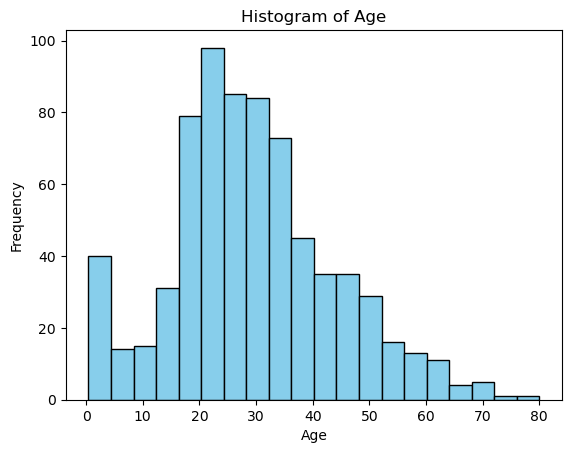

In [7]:
plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

### Replacing NA's

#### AGE by mean 

NOT DOING THIS

In [206]:
#df_data["Age"] = train["Age"].fillna(round(train["Age"].mean())) # Try dropping null age rows instead of imputing the mean


#plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.title('Histogram of Age')

# Show plot
#plt.show()

In [8]:
df_data[df_data['Title'] == "Master"]['Age'].describe()

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64

#### Age by median

Title:Master, Median:4.0
Title:Miss, Median:22.0
Title:Mr, Median:29.0
Title:Mrs, Median:35.0
Title:Millitary, Median:49.5
Title:Honor, Median:48.0
Missing Ages Estimated


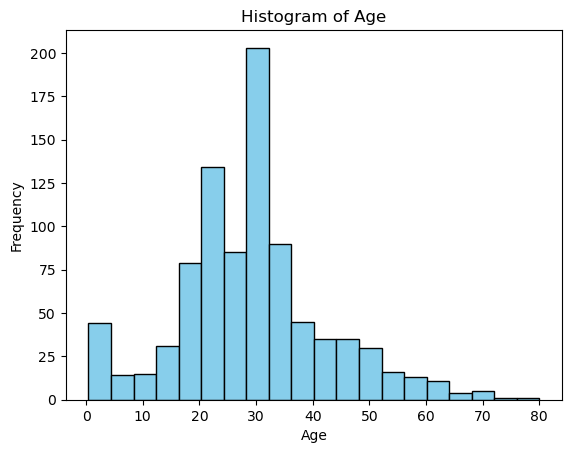

In [9]:
titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Millitary','Honor']
for title in titles:
    age_to_impute = df_data.groupby('Title')['Age'].median()[title]
    print(f'Title:{title}, Median:{age_to_impute}')
    df_data.loc[(df_data['Age'].isnull()) & (df_data['Title'] == title), 'Age'] = age_to_impute
# Age in df_train and df_test:
train["Age"] = df_data['Age'][:891]
test["Age"] = df_data['Age'][891:]
print('Missing Ages Estimated')

plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

### Dropping NA's

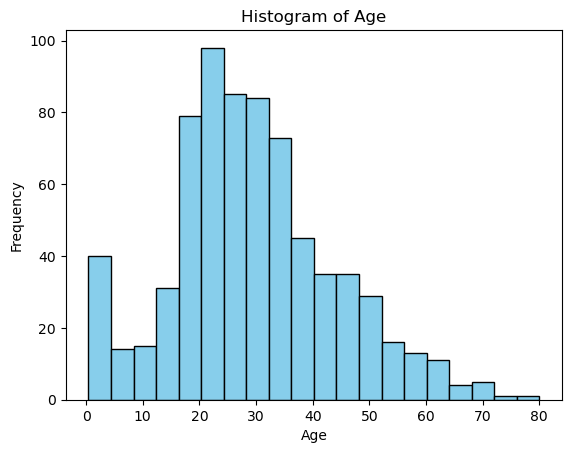

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
train = train.dropna(subset = ['Age'])

plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

train["Age"].describe()

In [388]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,False,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,False,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Millitary,False,False,True,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,False,False,False,True,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,False,False,False,True,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,False,False,False,False,True,False


## Dummy Variables for Pclass and Sex

In [10]:
train = pd.get_dummies(train, columns=['Pclass'], prefix=['class'])
train[['class_1', 'class_2', 'class_3']] = train[['class_1', 'class_2', 'class_3']].astype(int)
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,class_1,class_2,class_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,Mr,False,False,False,False,True,False,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,Mrs,False,False,False,False,False,True,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,Miss,False,False,False,True,False,False,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,Mrs,False,False,False,False,False,True,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,Mr,False,False,False,False,True,False,0,0,1


## Dropping Name, Ticket, Embarked and Cabin

In [11]:
train["Sex"] = pd.get_dummies(train[["Sex"]], drop_first = True)
train.rename(columns={'Sex': 'Male'}, inplace=True)

#train["Embarked"].value_counts()
#train["Embarked"] = train["Embarked"].fillna("S")
#train["Embarked_C"] = pd.get_dummies(train[["Embarked"]])[["Embarked_C"]]
#train["Embarked_S"] = pd.get_dummies(train[["Embarked"]])[["Embarked_S"]]
#train["Embarked_Q"] = pd.get_dummies(train[["Embarked"]])[["Embarked_Q"]]




train = train.drop(["Name", "Ticket", "Embarked", "Cabin"], axis = 1)
train = train.drop(['Title'], axis = 1)

title_list = ['Title_Honor','Title_Master','Title_Millitary','Title_Miss','Title_Mr','Title_Mrs']

#Talk about dropping these columns; especially about PassengerId, because of how much worse the models got after dropping it.
train

,PassengerId,Survived,Male,Age,SibSp,Parch,Fare,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,class_1,class_2,class_3
0,1,0,True,22.0,1,0,7.2500,False,False,False,False,True,False,0,0,1
1,2,1,False,38.0,1,0,71.2833,False,False,False,False,False,True,1,0,0
2,3,1,False,26.0,0,0,7.9250,False,False,False,True,False,False,0,0,1
3,4,1,False,35.0,1,0,53.1000,False,False,False,False,False,True,1,0,0
4,5,0,True,35.0,0,0,8.0500,False,False,False,False,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,True,27.0,0,0,13.0000,False,False,True,False,False,False,0,1,0
887,888,1,False,19.0,0,0,30.0000,False,False,False,True,False,False,1,0,0
888,889,0,False,22.0,1,2,23.4500,False,False,False,True,False,False,0,0,1
889,890,1,True,26.0,0,0,30.0000,False,False,False,False,True,False,1,0,0


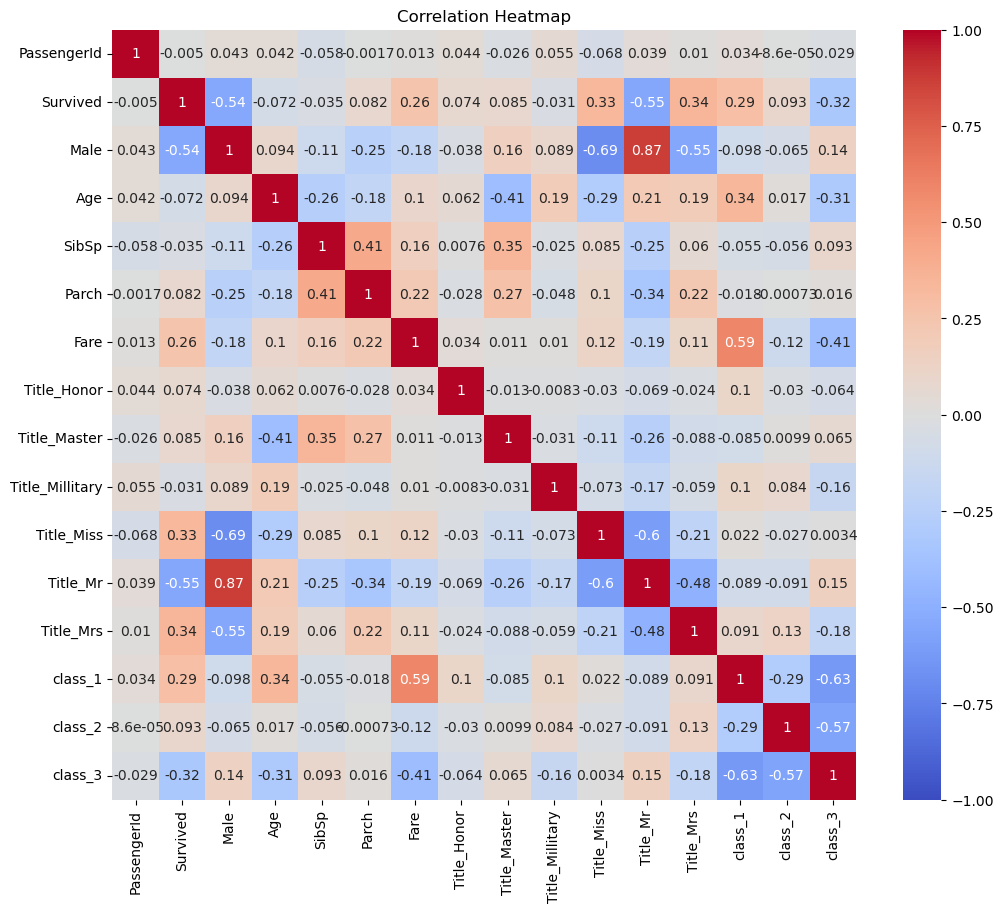

In [12]:
corr_train = train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_train, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Investigating association between Fare and class

Maybe we don't need both fare and class because they're so highly correlated?

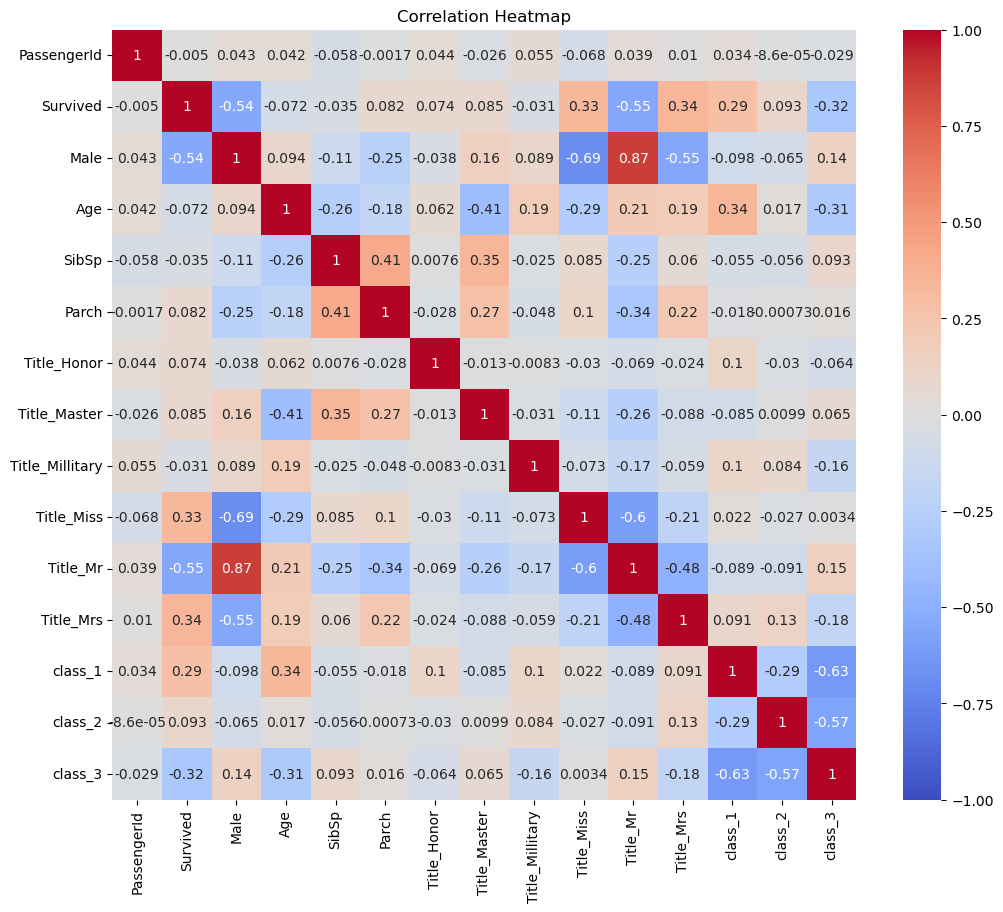

In [13]:
no_fare_train = train.iloc[:,np.r_[0:6,7:16]]

no_fare_corr = no_fare_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(no_fare_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

test_train = train
test_train['Intercept'] = 1

# Create a DataFrame with only the predictor variables
X = test_train[['Fare', 'class_1','class_2', 'Intercept']]

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable       VIF
0       Fare  1.545820
1    class_1  1.662552
2    class_2  1.095860
3  Intercept  1.931867


It looks like there's not enough evidence of multicollinearity to justify not including either the Fare or the Class Variable in the model.

In [15]:
train = train.drop(columns = ['Intercept'])
train

,PassengerId,Survived,Male,Age,SibSp,Parch,Fare,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,class_1,class_2,class_3
0,1,0,True,22.0,1,0,7.2500,False,False,False,False,True,False,0,0,1
1,2,1,False,38.0,1,0,71.2833,False,False,False,False,False,True,1,0,0
2,3,1,False,26.0,0,0,7.9250,False,False,False,True,False,False,0,0,1
3,4,1,False,35.0,1,0,53.1000,False,False,False,False,False,True,1,0,0
4,5,0,True,35.0,0,0,8.0500,False,False,False,False,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,True,27.0,0,0,13.0000,False,False,True,False,False,False,0,1,0
887,888,1,False,19.0,0,0,30.0000,False,False,False,True,False,False,1,0,0
888,889,0,False,22.0,1,2,23.4500,False,False,False,True,False,False,0,0,1
889,890,1,True,26.0,0,0,30.0000,False,False,False,False,True,False,1,0,0


# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

x,y = train.iloc[:,np.r_[0,2:16]], train.iloc[:,1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3,
                                                    random_state = 0,
                                                    stratify=y)

x_train

,PassengerId,Male,Age,SibSp,Parch,Fare,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,class_1,class_2,class_3
231,232,True,29.0,0,0,7.7750,False,False,False,False,True,False,0,0,1
836,837,True,21.0,0,0,8.6625,False,False,False,False,True,False,0,0,1
639,640,True,29.0,1,0,16.1000,False,False,False,False,True,False,0,0,1
389,390,False,17.0,0,0,12.0000,False,False,False,True,False,False,0,1,0
597,598,True,49.0,0,0,0.0000,False,False,False,False,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,True,20.0,0,0,7.0500,False,False,False,False,True,False,0,0,1
490,491,True,29.0,1,0,19.9667,False,False,False,False,True,False,0,0,1
838,839,True,32.0,0,0,56.4958,False,False,False,False,True,False,0,0,1
48,49,True,29.0,2,0,21.6792,False,False,False,False,True,False,0,0,1


## Title Drop df

In [17]:
x_train_nt = x_train.drop(title_list, axis = 1)
x_test_nt = x_test.drop(title_list, axis = 1)

In [18]:
x_train_nt

,PassengerId,Male,Age,SibSp,Parch,Fare,class_1,class_2,class_3
231,232,True,29.0,0,0,7.7750,0,0,1
836,837,True,21.0,0,0,8.6625,0,0,1
639,640,True,29.0,1,0,16.1000,0,0,1
389,390,False,17.0,0,0,12.0000,0,1,0
597,598,True,49.0,0,0,0.0000,0,0,1
...,...,...,...,...,...,...,...,...,...
131,132,True,20.0,0,0,7.0500,0,0,1
490,491,True,29.0,1,0,19.9667,0,0,1
838,839,True,32.0,0,0,56.4958,0,0,1
48,49,True,29.0,2,0,21.6792,0,0,1


## Data Scaling NEED TO TRY DIFFERENT SCALERS

### standard scaler

In [19]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

x_train_ntstd = stdsc.fit_transform(x_train_nt)
x_test_ntstd = stdsc.transform(x_test_nt)

### Normalization (MinMaxScaler)

In [64]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x_train_mmscale = mmscaler.fit_transform(x_train)
x_test_mmscale = mmscaler.fit_transform(x_test)

x_train_mmscale
x_test_mmscale

array([[0.4735658 , 1.        , 0.28825623, ..., 0.        , 0.        ,
        1.        ],
       [0.6951631 , 0.        , 0.04626335, ..., 0.        , 1.        ,
        0.        ],
       [0.13048369, 1.        , 0.99288256, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.57592801, 1.        , 0.50177936, ..., 1.        , 0.        ,
        0.        ],
       [0.85264342, 1.        , 0.47330961, ..., 0.        , 0.        ,
        1.        ],
       [0.68278965, 1.        , 0.37366548, ..., 1.        , 0.        ,
        0.        ]])

### Robust Scaling (RobustScaler)

In [67]:
from sklearn.preprocessing import RobustScaler

rbscaler = RobustScaler()
x_train_rbscale = rbscaler.fit_transform(x_train)
x_test_rbscale = rbscaler.fit_transform(x_test)

x_train_rbscale
x_test_rbscale

array([[-0.07225964,  0.        , -0.57142857, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41028781, -1.        , -1.78571429, ...,  0.        ,
         1.        , -1.        ],
       [-0.81935089,  0.        ,  2.96428571, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.15064299,  0.        ,  0.5       , ...,  1.        ,
         0.        , -1.        ],
       [ 0.75321494,  0.        ,  0.35714286, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38334354,  0.        , -0.14285714, ...,  1.        ,
         0.        , -1.        ]])

### Other

Log transforms
Power transforms
Quintile transforms

# Feature Selection

## Sequential Backward selection (SBS) feature selection

### Code

In [20]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dim = x_train_std.shape[1]

for p in combinations(tuple(range(dim)), r=dim -1):
                      print(p)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14)
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14)
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14)
(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14)
(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14)
(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)


In [27]:
class SBS:
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, x,y):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = self.test_size,
                                                        random_state = self.random_state)
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets = [self.indices_]
        score = self._calc_score(x_train,y_train,x_test,y_test,self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(x_train,y_train,x_test,y_test, p)
                scores.append(scores)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, x,y):
        return x[:,self.indices_]
    
    def _calc_score(self, x_train,y_train,x_test,y_test, indices):
        self.estimator.fit(x_train[:,indices],y_train)
        y_pred = self.estimator.predict(x_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score

## Use rf for feature selection

Import feature selection function and combine with an rf to find the 5 most important features, and then use those features with other models. Compare those models to general rf, as well as models that don't use different methods of feature selection (SBS, manual) or no feature selection at all.

In [337]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = x_train.columns
forest = RandomForestClassifier(n_estimators = 500,
                               random_state = 1,
                               n_jobs = 2)
forest.fit(x_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("2%d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

21) Fare                           0.192378
22) PassengerId                    0.185990
23) Age                            0.138828
24) Title_Mr                       0.122052
25) Male                           0.108230
26) class_3                        0.048941
27) SibSp                          0.047573
28) Title_Mrs                      0.034983
29) Title_Miss                     0.031347
210) class_1                        0.026196
211) Parch                          0.025926
212) class_2                        0.017291
213) Title_Master                   0.011852
214) Title_Millitary                0.008233
215) Title_Honor                    0.000179


It looks like PassengerID, Age, and Male/Sex are the most important. I have a feeling that Fare and Pclass are highly correlated. Passenger ID was dropped from the initial train dataset, which negatively impacted the performance of all the models by a couple percentage points. However I think it's safe to say that any correlation between Passenger ID (index) and death is coincidentaly, and isn't representative of any real relationship.

In [21]:
x_train.head()

,PassengerId,Male,Age,SibSp,Parch,Fare,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,class_1,class_2,class_3
231,232,True,29.0,0,0,7.7750,False,False,False,False,True,False,0,0,1
836,837,True,21.0,0,0,8.6625,False,False,False,False,True,False,0,0,1
639,640,True,29.0,1,0,16.1000,False,False,False,False,True,False,0,0,1
389,390,False,17.0,0,0,12.0000,False,False,False,True,False,False,0,1,0
597,598,True,49.0,0,0,0.0000,False,False,False,False,True,False,0,0,1


In [22]:
print(x_train.columns)
indices = [0,1,2]
selected_feats = [list(x_train.columns)[i] for i in indices]
print(selected_feats)

x_train_select = x_train.iloc[:,np.r_[0,1,2]]
x_test_select = x_test.iloc[:,np.r_[0,1,2]]

Index(['PassengerId', 'Male', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Honor',
       'Title_Master', 'Title_Millitary', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'class_1', 'class_2', 'class_3'],
      dtype='object')
['PassengerId', 'Male', 'Age']


## Principal Component Analysis

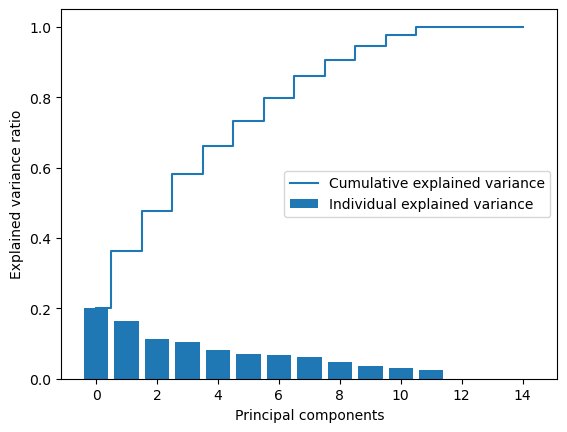

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
x_train_pca = pca.fit_transform(x_train_std)
pca.explained_variance_ratio_

plt.bar(range(0, 15), pca.explained_variance_ratio_, align='center',label='Individual explained variance')
plt.step(range(0, 15), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.show()

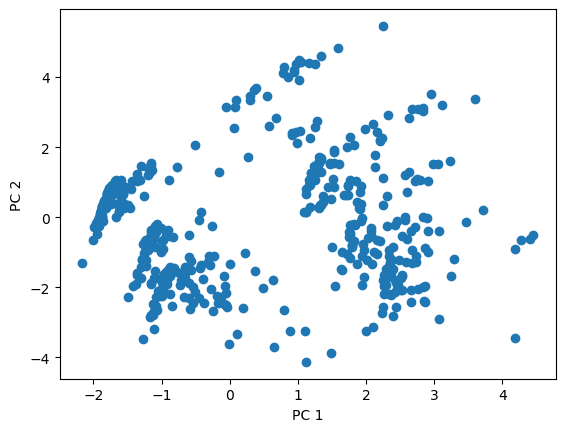

In [24]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### PCA for non_title df

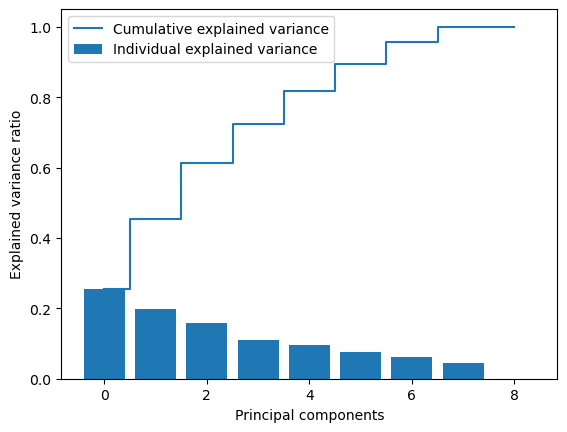

In [428]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train_ntstd)
pca.explained_variance_ratio_

plt.bar(range(0, 9), pca.explained_variance_ratio_, align='center',label='Individual explained variance')
plt.step(range(0, 9), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.show()

## Decision Region Function

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

# Models

## Logistic Regression

In [25]:
highscore = 0

### LR Iteration

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100, solver = 'lbfgs')
lr.fit(x_train_mmscale,y_train)

y_pred = lr.predict(x_test_mmscale)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))

Accuracy: 0.832


/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr.fit(x_train_std,y_train)

y_pred = lr.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.832
Highscore: 0.869


### SBS + LR

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector

sbs = SequentialFeatureSelector(lr, n_features_to_select = 8)
sbs.fit(x_train_std, y_train)

print(x_train.columns[list(np.where(sbs.get_support())[0])])

x_train_sbs = x_train_std[:,list(np.where(sbs.get_support())[0])]

lr_sbs = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr_sbs.fit(x_train_sbs,y_train)

y_pred = lr_sbs.predict(x_test_std[:,list(np.where(sbs.get_support())[0])])

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore: {highscore.round(3)}")
else:
    print("Score = Highscore")

Index(['PassengerId', 'Male', 'SibSp', 'Parch', 'Title_Honor', 'Title_Master',
       'class_1', 'class_3'],
      dtype='object')
Accuracy: 0.828
Highscore: 0.869


Interesting that the accuracy went down a little bit after feature selection

In [54]:
sbs2 = SequentialFeatureSelector(lr, n_features_to_select = 5)
sbs2.fit(x_train_std, y_train)

print(x_train.columns[list(np.where(sbs2.get_support())[0])])

x_train_sbs2 = x_train_std[:,list(np.where(sbs2.get_support())[0])]

lr_sbs2 = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr_sbs2.fit(x_train_sbs2,y_train)

y_pred = lr_sbs2.predict(x_test_std[:,list(np.where(sbs2.get_support())[0])])

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore: {highscore.round(3)}")
else:
    print("Score = Highscore")

Index(['Male', 'SibSp', 'Parch', 'Title_Master', 'class_3'], dtype='object')
Accuracy: 0.825
Highscore: 0.869


### LR with PCA (with titles)

#### n_components = 2

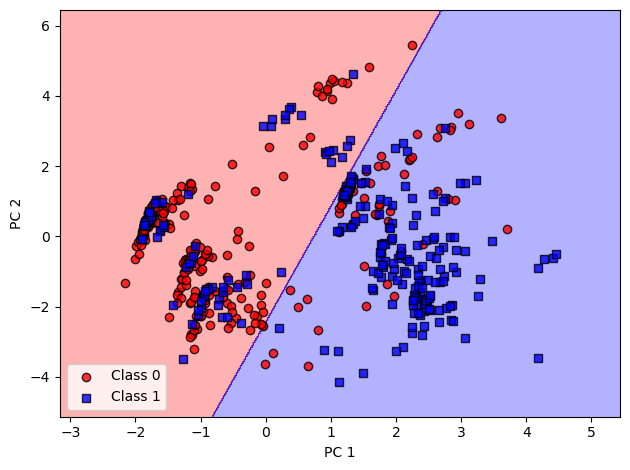

In [32]:
# TRAINING + PLOT

from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr = lr.fit(x_train_pca, y_train)

plot_decision_regions(x_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

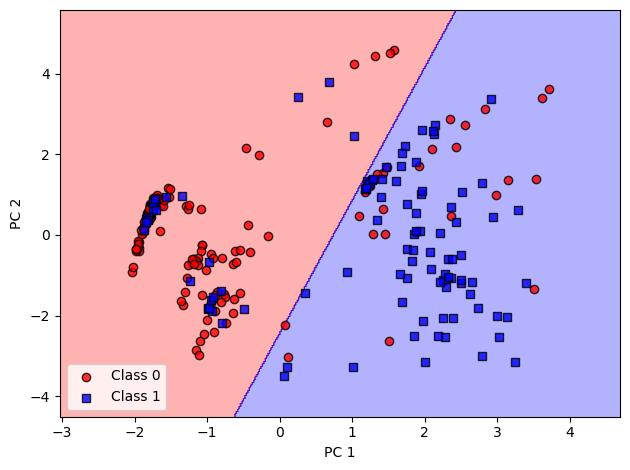

Accuracy: 0.799
Highscore: 0.832


In [33]:
# TEST + PLOT
plot_decision_regions(x_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_05.png', dpi=300)
plt.show()

y_pred = lr.predict(x_test_pca)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

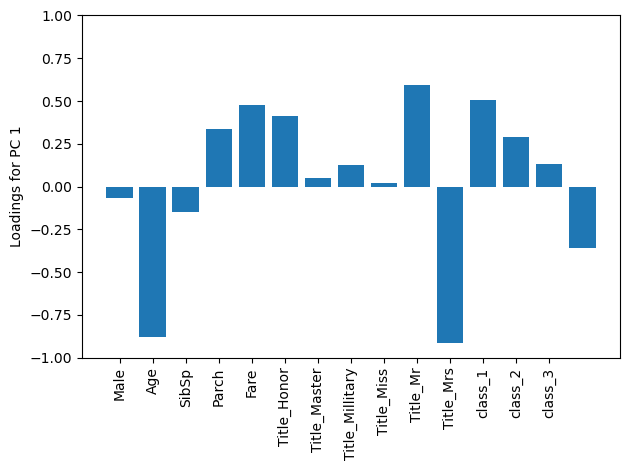

In [34]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(15), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(14))
ax.set_xticklabels(x_train.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

Definitely looks like there's a relationship there that's not being captured, and the classifier is only 80% accurate on the test case.

#### n_components = 3,4,5

In [35]:
# N = 3

pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial',random_state = 1)
lr = lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.795
Highscore: 0.832


In [36]:
# N = 4

pca = PCA(n_components=4)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial', random_state = 1)
lr = lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.795
Highscore: 0.832


In [37]:
pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial', random_state = 1)
lr = lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.795
Highscore: 0.832


### LR + PCA (no titles)

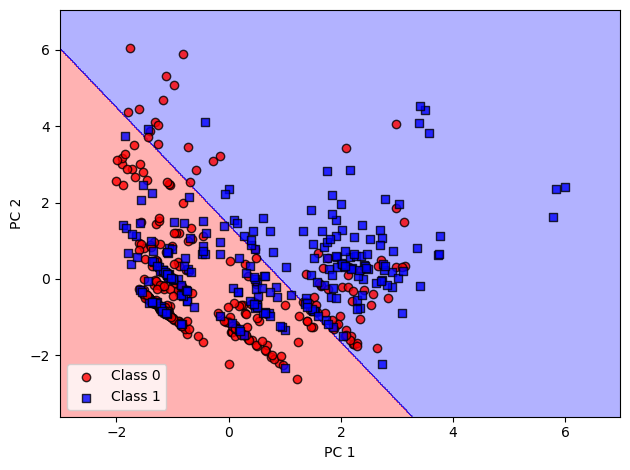

In [38]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_ntstd)
x_test_pca = pca.transform(x_test_ntstd)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr = lr.fit(x_train_pca, y_train)

plot_decision_regions(x_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### LR women and children

In [39]:
x_train

,PassengerId,Male,Age,SibSp,Parch,Fare,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs,class_1,class_2,class_3
231,232,True,29.0,0,0,7.7750,False,False,False,False,True,False,0,0,1
836,837,True,21.0,0,0,8.6625,False,False,False,False,True,False,0,0,1
639,640,True,29.0,1,0,16.1000,False,False,False,False,True,False,0,0,1
389,390,False,17.0,0,0,12.0000,False,False,False,True,False,False,0,1,0
597,598,True,49.0,0,0,0.0000,False,False,False,False,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,True,20.0,0,0,7.0500,False,False,False,False,True,False,0,0,1
490,491,True,29.0,1,0,19.9667,False,False,False,False,True,False,0,0,1
838,839,True,32.0,0,0,56.4958,False,False,False,False,True,False,0,0,1
48,49,True,29.0,2,0,21.6792,False,False,False,False,True,False,0,0,1


In [40]:
x_train_wc = x_train.iloc[:,np.r_[1,2]]
x_test_wc = x_test.iloc[:,np.r_[1,2]]

In [41]:
lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr.fit(x_train_wc,y_train)

y_pred = lr.predict(x_test_wc)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.791
Highscore: 0.832


## RF

### First RF

In [42]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 25,
                               random_state=1,
                               n_jobs = 2)
forest.fit(x_train_std,y_train)
y_pred = forest.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.843
New Highscore!: 0.843


#### RF parameter iteration

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 29,
                               random_state=1,
                               n_jobs = 2,
                               max_depth = None,
                               min_samples_split = 10,
                               min_samples_leaf = 1,
                               max_leaf_nodes = 46)
forest.fit(x_train_std,y_train)
y_pred = forest.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.869
Score = Highscore


In [44]:
score_list = []
for i in list(range(2, 100)):
    forest = RandomForestClassifier(n_estimators = 77,
                               random_state=1,
                                   min_samples_split = 8,
                                   max_leaf_nodes = 46)
    forest.fit(x_train,y_train)
    y_pred = forest.predict(x_test)
    score_list.append([accuracy_score(y_test,y_pred), f"max_depth = {i}"])
    

max(score_list)

KeyboardInterrupt: 

#### Grid Search

Grid searching takes a really long time

In [279]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 1)

param_grid = {
    'n_estimators': [i for i in range(26,32)],
    'min_samples_split': [i for i in range(7,13)],
    'max_leaf_nodes': [i for i in range(43,49)],
    'random_state': [1]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_leaf_nodes': 48, 'min_samples_split': 8, 'n_estimators': 26, 'random_state': 1}
Accuracy: 0.8395522388059702


## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.657
Highscore: 0.869


In [46]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(x_train_select,y_train)

y_pred = knn.predict(x_test_select)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.560
Highscore: 0.869


## SVM

### Linear

In [47]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
svm = SVC(kernel = "linear", C = 1, random_state = 1)
svm.fit(x_train_std, y_train)

y_pred = svm.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.817
Highscore: 0.869


In [48]:
svc = LinearSVC(C=9, 
                random_state=1, 
                dual = 'auto',
               max_iter = 9,)

svc.fit(x_train_std, y_train)

y_pred = svc.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.825
Highscore: 0.869


In [49]:
score_list = []
for i in list(range(7,50)):
    svc = LinearSVC(C=9, 
                random_state=1, 
                dual = 'auto',
               max_iter = i,)

    svc.fit(x_train_std, y_train)

    y_pred = svc.predict(x_test_std)
    score_list.append([round(accuracy_score(y_test,y_pred), 4), f"max_iter = {i}"])
    

max(score_list)

[0.8246, 'max_iter = 9']

#### Select columns

In [50]:
svm = SVC(kernel = "linear", C = 1, random_state = 1)
svm.fit(x_train_select, y_train)

y_pred = svm.predict(x_test_select)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.791
Highscore: 0.869


### Non-Linear with Kernel

In [51]:
svm = SVC(kernel = "rbf", C = 10, random_state = 1, gamma = 0.1) #probably not needed, but lets see what happens
svm.fit(x_train_std, y_train)

y_pred = svm.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.802
Highscore: 0.869


In [318]:
svm = SVC(kernel = "rbf", C = 10, random_state = 1, gamma = 0.2) #probably not needed, but lets see what happens
svm.fit(x_train_std, y_train)

y_pred = svm.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.799
Highscore: 0.869


In [319]:
svm = SVC(kernel = "rbf", C = 10, random_state = 1, gamma = 0.6) #probably not needed, but lets see what happens
svm.fit(x_train_std, y_train)

y_pred = svm.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

Accuracy: 0.813
Highscore: 0.869


#### Select columns

In [320]:
svm = SVC(kernel = "rbf", C = 10, random_state = 1, gamma = 0.2) #probably not needed, but lets see what happens
svm.fit(x_train_select, y_train)

y_pred = svm.predict(x_test_select)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

ValueError: Found input variables with inconsistent numbers of samples: [499, 623]

Very interesting that when the fewer "select" features are used, the model becomes way way worse.

## Neural Networks

Graph everything, matplot.pyplot, seaborn